In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

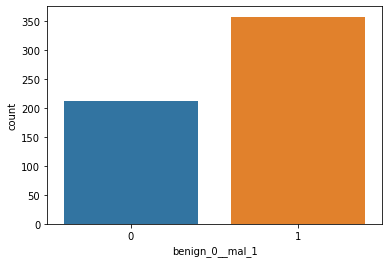

In [5]:
# Let's check the balance within the target valiable.
sns.countplot(x='benign_0__mal_1', data= df)

<AxesSubplot:>

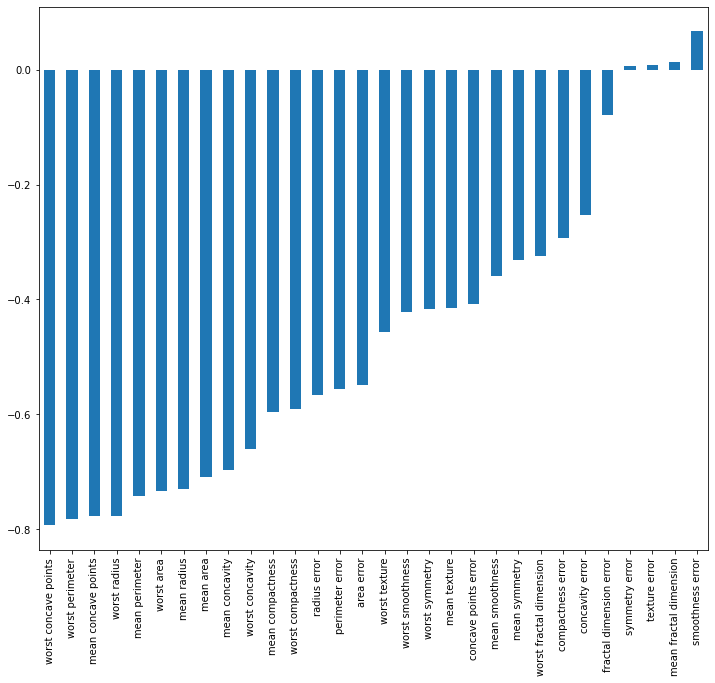

In [6]:
# Check the correlation of features with the target variable.
plt.figure(figsize= (12,10))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

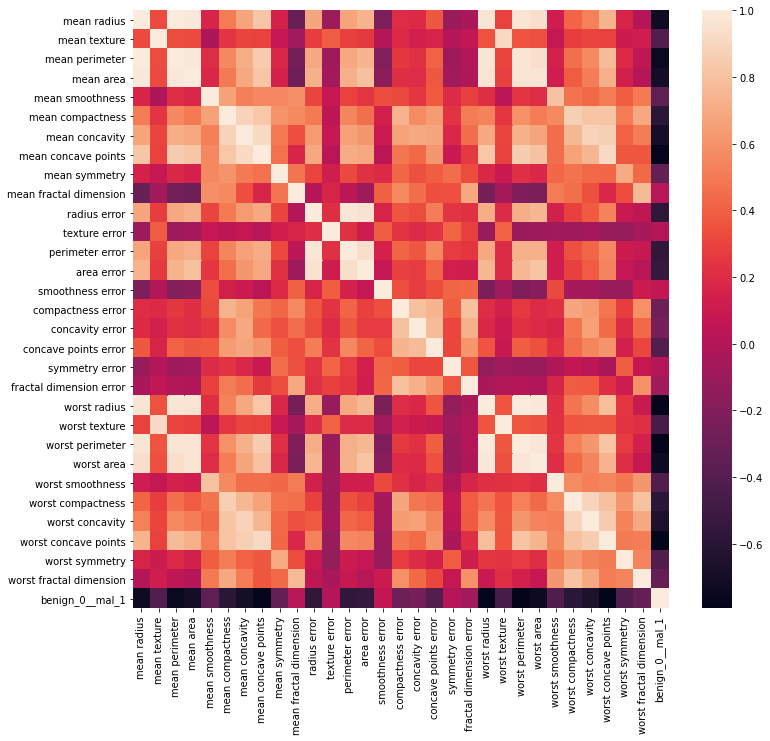

In [7]:
plt.figure(figsize=(12,11))
sns.heatmap(df.corr())

## Preprocessing and Normalisation

In [8]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_train.shape

(398,)

## Model Creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# For Binary classification o/p node will be sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [15]:
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test), epochs= 600)

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.7041 - val_loss: 0.6783
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6594 - val_loss: 0.6453
Epoch 3/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6216 - val_loss: 0.6088
Epoch 4/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5803 - val_loss: 0.5684
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5354 - val_loss: 0.5224
Epoch 6/600
13/13 [==============================] - 0s 1ms/step - loss: 0.4858 - val_loss: 0.4757
Epoch 7/600
13/13 [==============================] - 0s 1ms/step - loss: 0.4379 - val_loss: 0.4283
Epoch 8/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3949 - val_loss: 0.3865
Epoch 9/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3520 - val_loss: 0.3487
Epoch 10/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3175 - val_loss: 0.3180
Epoch 11

13/13 [==============================] - 0s 1ms/step - loss: 0.0410 - val_loss: 0.1374
Epoch 81/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0418 - val_loss: 0.1376
Epoch 82/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0402 - val_loss: 0.1391
Epoch 83/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0425 - val_loss: 0.1380
Epoch 84/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0432 - val_loss: 0.1381
Epoch 85/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0392 - val_loss: 0.1383
Epoch 86/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0387 - val_loss: 0.1410
Epoch 87/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0392 - val_loss: 0.1399
Epoch 88/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0401 - val_loss: 0.1390
Epoch 89/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0385 - val_loss: 0.1408
Epoch 90/600


13/13 [==============================] - 0s 2ms/step - loss: 0.0275 - val_loss: 0.1572
Epoch 162/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0263 - val_loss: 0.1571
Epoch 163/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0265 - val_loss: 0.1563
Epoch 164/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.1564
Epoch 165/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0260 - val_loss: 0.1577
Epoch 166/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.1577
Epoch 167/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.1588
Epoch 168/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0269 - val_loss: 0.1595
Epoch 169/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0257 - val_loss: 0.1586
Epoch 170/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0248 - val_loss: 0.1591
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0206 - val_loss: 0.1910
Epoch 243/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.1950
Epoch 244/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0166 - val_loss: 0.1936
Epoch 245/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0175 - val_loss: 0.1947
Epoch 246/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0184 - val_loss: 0.1938
Epoch 247/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0173 - val_loss: 0.1992
Epoch 248/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.1959
Epoch 249/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0162 - val_loss: 0.1967
Epoch 250/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0167 - val_loss: 0.1982
Epoch 251/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.1959
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.2586
Epoch 324/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.2608
Epoch 325/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0111 - val_loss: 0.2610
Epoch 326/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 0.2668
Epoch 327/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 0.2656
Epoch 328/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0103 - val_loss: 0.2679
Epoch 329/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0122 - val_loss: 0.2716
Epoch 330/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.2678
Epoch 331/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.2700
Epoch 332/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.2706
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.3540
Epoch 405/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.3580
Epoch 406/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.3591
Epoch 407/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.3579
Epoch 408/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.3607
Epoch 409/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 0.3592
Epoch 410/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.3669
Epoch 411/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0095 - val_loss: 0.3672
Epoch 412/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.3645
Epoch 413/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.3625
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 0.4504
Epoch 486/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.4451
Epoch 487/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.4435
Epoch 488/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.4491
Epoch 489/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0042 - val_loss: 0.4481
Epoch 490/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.4522
Epoch 491/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0042 - val_loss: 0.4556
Epoch 492/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.4548
Epoch 493/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.4560
Epoch 494/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.4546
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.5303
Epoch 567/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.5343
Epoch 568/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.5323
Epoch 569/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.5382
Epoch 570/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.5370
Epoch 571/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.5386
Epoch 572/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.5415
Epoch 573/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0032 - val_loss: 0.5368
Epoch 574/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.5420
Epoch 575/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.5436
Epoc

In [16]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

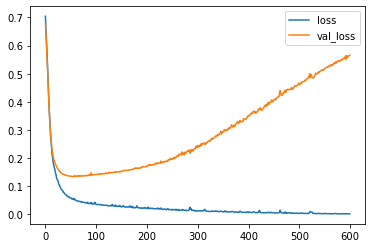

In [17]:
loss.plot()

Here we are overfitting the training dataset. At a certain pont the validation loss starts to increase and loss starts to decrease.

In [18]:
# We use EarlyStopping callbacks to stop the model from overfitting.
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# For Binary classification o/p node will be sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

from tensorflow.keras.callbacks import EarlyStopping

In [19]:
e_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose =1, patience=25)
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test), epochs= 600, callbacks=[e_stop])

Epoch 1/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6998 - val_loss: 0.6749
Epoch 2/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6651 - val_loss: 0.6482
Epoch 3/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6352 - val_loss: 0.6201
Epoch 4/600
13/13 [==============================] - 0s 1ms/step - loss: 0.6007 - val_loss: 0.5828
Epoch 5/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5604 - val_loss: 0.5425
Epoch 6/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5154 - val_loss: 0.4988
Epoch 7/600
13/13 [==============================] - 0s 1ms/step - loss: 0.4677 - val_loss: 0.4525
Epoch 8/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4203 - val_loss: 0.4088
Epoch 9/600
13/13 [==============================] - 0s 1ms/step - loss: 0.3762 - val_loss: 0.3703
Epoch 10/600
13/13 [==============================] - 0s 2ms/step - loss: 0.3371 - val_loss: 0.3353
Epoch 11/

13/13 [==============================] - 0s 1ms/step - loss: 0.0468 - val_loss: 0.1413
Epoch 84/600
13/13 [==============================] - 0s 1ms/step - loss: 0.0464 - val_loss: 0.1434
Epoch 00084: early stopping


<AxesSubplot:>

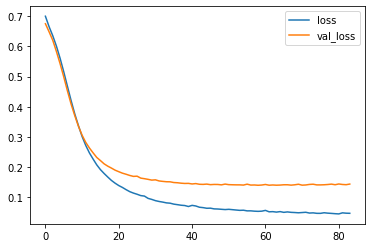

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [21]:
# To stop this overfiting we will add Droupout on neurons.

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# For Binary classification o/p node will be sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

from tensorflow.keras.callbacks import EarlyStopping
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test), epochs= 600, callbacks=[e_stop])

Epoch 1/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6979 - val_loss: 0.6635
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6690 - val_loss: 0.6506
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6497 - val_loss: 0.6375
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6327 - val_loss: 0.6131
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6161 - val_loss: 0.5858
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5867 - val_loss: 0.5544
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5536 - val_loss: 0.5202
Epoch 8/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5459 - val_loss: 0.4959
Epoch 9/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5306 - val_loss: 0.4706
Epoch 10/600
13/13 [==============================] - 0s 1ms/step - loss: 0.5076 - val_loss: 0.4449
Epoch 11/

13/13 [==============================] - 0s 1ms/step - loss: 0.1304 - val_loss: 0.1256
Epoch 81/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1418 - val_loss: 0.1230
Epoch 82/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1327 - val_loss: 0.1222
Epoch 83/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1140 - val_loss: 0.1235
Epoch 84/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1258 - val_loss: 0.1230
Epoch 85/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1181 - val_loss: 0.1210
Epoch 86/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1183 - val_loss: 0.1202
Epoch 87/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1144 - val_loss: 0.1210
Epoch 88/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.1254
Epoch 89/600
13/13 [==============================] - 0s 1ms/step - loss: 0.1448 - val_loss: 0.1219
Epoch 90/600


<AxesSubplot:>

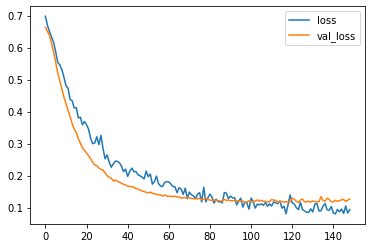

In [22]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Now the validation loss and model loss is going down.

In [24]:
# Let's validate the classes
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



[[ 63   3]
 [  2 103]]
